In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The Bangalore EEG Epilepsy Dataset (BEED) is taken from site https://archive.ics.uci.edu/:
- is a comprehensive EEG collection for epileptic seizure detection and classification. Recorded at a neurological research centre in Bangalore
- it features high-fidelity EEG signals captured using the standard 10-20 electrode system at a 256 Hz sampling rate.

In [2]:
beed_df = pd.read_csv(r'C:\Users\aayus\Dev\Core_ML\Monthly\data\BEED_Data.csv')
print(beed_df.shape)
beed_df.head()

(8000, 17)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
1,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
2,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
3,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0
4,-67,-90,-97,-94,-86,-71,-43,-11,23,46,58,50,39,19,-9,-41,0


In [3]:
beed_y = beed_df['y']
beed_X = beed_df.drop(['y'], axis=1)
beed_X.head()
beed_y.value_counts()

y
0    2000
1    2000
2    2000
3    2000
Name: count, dtype: int64

In [4]:
beed_corr = beed_X.corr()

<Axes: >

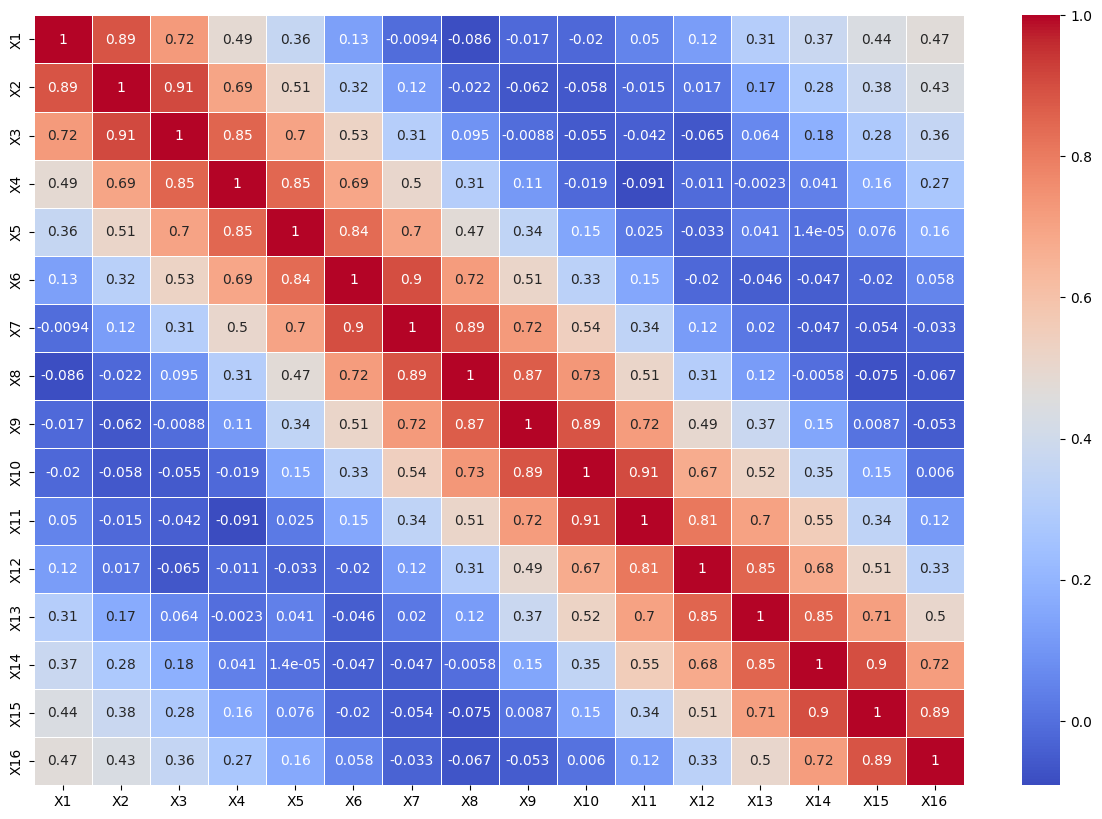

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(beed_corr, annot=True, linewidths=0.5, cmap='coolwarm')

In [6]:
beed_X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-1.490375,-2.189375,-3.23750,-4.119375,-1.821625,-2.311750,-3.398125,-3.448625,-1.647875,-2.56125,-3.524500,-4.782750,-2.164000,-2.910875,-4.355375,-4.113750
std,36.824213,36.108088,35.80249,36.285268,37.621284,36.306006,36.358395,36.522214,38.107721,37.54068,37.343938,37.469582,38.144075,36.640555,36.242793,35.933601
min,-281.000000,-255.000000,-255.00000,-257.000000,-264.000000,-277.000000,-277.000000,-260.000000,-290.000000,-302.00000,-276.000000,-306.000000,-288.000000,-290.000000,-323.000000,-317.000000
25%,-7.000000,-7.000000,-7.00000,-10.000000,-10.000000,-8.000000,-8.000000,-7.000000,-7.000000,-8.00000,-8.000000,-11.000000,-10.000000,-8.000000,-9.000000,-6.000000
50%,0.000000,0.000000,-1.00000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.00000,-1.000000,-2.000000,0.000000,0.000000,-2.000000,-1.000000
75%,8.000000,8.000000,5.00000,7.000000,10.000000,8.000000,6.000000,5.000000,8.000000,8.00000,5.000000,7.000000,10.000000,9.000000,5.000000,4.000000
max,252.000000,261.000000,238.00000,246.000000,249.000000,245.000000,220.000000,271.000000,280.000000,251.00000,262.000000,283.000000,296.000000,291.000000,251.000000,270.000000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_X, test_X, train_y, test_y = train_test_split(beed_X, beed_y, random_state=42, test_size=0.3)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
RandomForestClf = RandomForestClassifier()
 
RandomForestClf.fit(train_X, train_y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
RandomForestPred = RandomForestClf.predict(test_X)

print(accuracy_score(test_y, RandomForestPred))

0.9620833333333333


In [12]:
param = {'n_estimators' : [None, 25, 50, 75, 125, 250, 500],
         'max_depth' : [None, 50, 60, 12, 5],
         'max_leaf_nodes' : [None, 50, 25, 5, 100]}

In [13]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

Forest_cv = RandomForestClassifier()

clf = GridSearchCV(estimator= Forest_cv, param_grid=param, cv=5, return_train_score=False)

In [ ]:
clf.fit(train_X, train_y)

In [ ]:
clf.best_params_
clf.best_score_

np.float64(0.9542857142857143)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

GradBoostClf = GradientBoostingClassifier()

In [18]:
GradBoostClf.fit(train_X, train_y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [19]:
GradBoostPred = GradBoostClf.predict(test_X)

print(accuracy_score(test_y, GradBoostPred))

0.8941666666666667


In [21]:
first_estimator = GradBoostClf.estimators_
first_estimator

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x144186F7540),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x144186F7540),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x144186F7540),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x144186F7540)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x144186F7540),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x144186F7540),
        DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                  